In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

In [283]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
pd.options.mode.chained_assignment = None

##### Data Fields
<div>
datetime - hourly date + timestamp<br>  
season -<br>
1: spring, 2: summer,3: fall, 4: winter<br> 
holiday - whether the day is considered a holiday<br>
workingday - whether the day is neither a weekend nor holiday<br>
weather -<br>
1: Clear, Few clouds, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br> 
temp - temperature in Celsius<br>
atemp - "feels like" temperature in Celsius<br>
humidity - relative humidity<br>
windspeed - wind speed<br>
casual - number of non-registered user rentals initiated<br>
registered - number of registered user rentals initiated<br>
count - number of total rentals<br>
</div>

In [284]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [285]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [286]:
#檢查空值
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [287]:
#檢查空值
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [288]:
#檢查資料分佈情況
train.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-11 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [289]:
#檢查資料分佈情況
test.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
unique,6493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-03-23 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,NaN,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,NaN,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,NaN,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900


#### Feature Enginnering

In [290]:
#觀察去掉outlier的前後資料數量差異
print('Shape Of Before Outlier:', train.shape)
train = train[np.abs(train['count']-train['count'].mean()) <= (3*(train['count'].std()))]
print('Shape Of After Outlier:', train.shape)

Shape Of Before Outlier: (10886, 12)
Shape Of After Outlier: (10739, 12)


In [291]:
data = train.append(test)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

In [292]:
#把日期切分出來，新增日期、年、月、星期幾、小時的欄位
data['date'] = data['datetime'].apply(lambda x: x.split()[0])
data['year'] = data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
data['month'] = data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').month)
data['weekday'] = data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').weekday())
data['hour'] = data['datetime'].apply(lambda x: x.split()[1].split(':')[0]).astype('int')

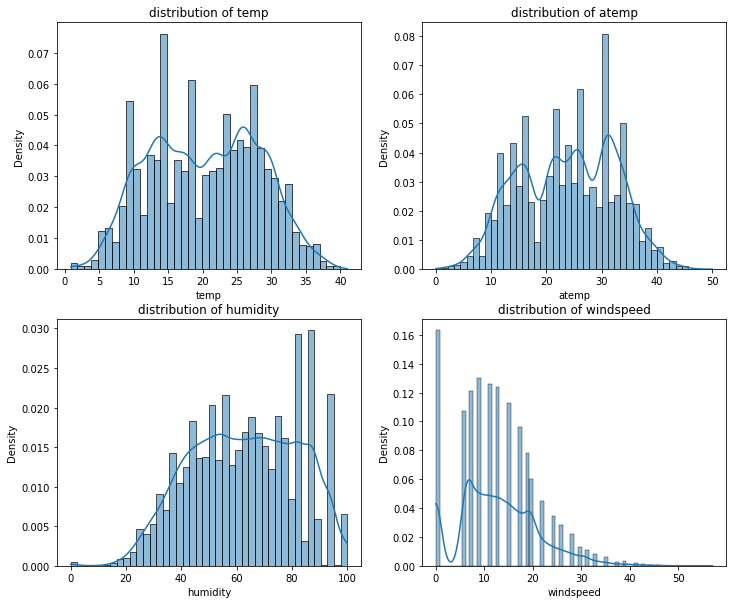

In [293]:
#畫出資料分佈
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
#sns.distplot(data["temp"],ax=axes[0][0])
sns.histplot(data=data, x=data['temp'], stat='density', kde=True, ax = axes[0][0])
sns.histplot(data=data, x=data['atemp'], stat='density', kde=True, ax = axes[0][1])
sns.histplot(data=data, x=data['humidity'], stat='density', kde=True, ax = axes[1][0])
sns.histplot(data=data, x=data['windspeed'], stat='density', kde=True, ax = axes[1][1])

axes[0][0].set(xlabel='temp',title='distribution of temp')
axes[0][1].set(xlabel='atemp',title='distribution of atemp')
axes[1][0].set(xlabel='humidity',title='distribution of humidity')
axes[1][1].set(xlabel='windspeed',title='distribution of windspeed');

#### Correlation heatmap
<div>
Seaborn中的回歸圖是描述兩個特徵之間關係的一種有用方式。後續將從測試資料中刪除'casual','count','datetime','date','registered','atemp'欄位。
[]
</div>

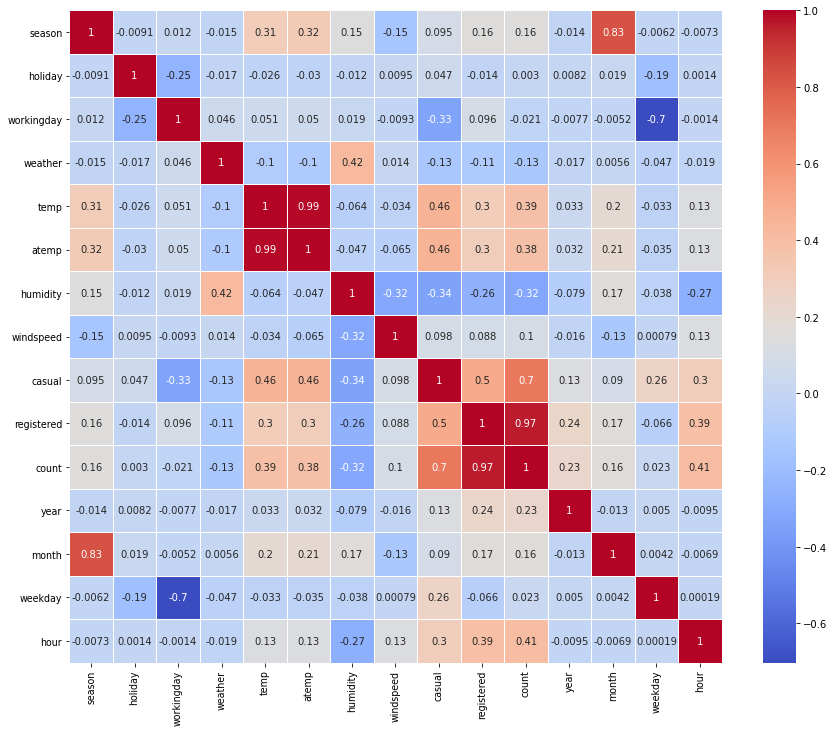

In [323]:
fig, axes = plt.subplots(figsize = (15, 12))
corr = data.corr()
sns.heatmap(corr, linewidths=.5, cmap='coolwarm', annot=True, square=True)
plt.xticks(fontsize=9.5)
plt.yticks(rotation=0,fontsize=9.5);

In [294]:
dataWind_0 = data[data['windspeed'] == 0]
dataWind_Not0 = data[data['windspeed'] != 0]

rfModel_Wind = RandomForestRegressor(n_estimators=1000, random_state=42)
windColumns = ['season','weather','humidity','temp','year','month']
rfModel_Wind.fit(dataWind_Not0[windColumns],dataWind_Not0['windspeed'])

wind0Values = rfModel_Wind.predict(X=dataWind_0[windColumns])

In [295]:
dataWind_0.loc[:,'windspeed'] = wind0Values

data = dataWind_Not0.append(dataWind_0)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

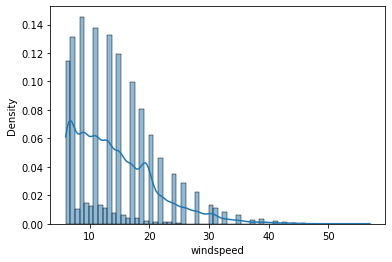

In [296]:
sns.histplot(data=data, x=data['windspeed'], kde=True, stat='density');

In [297]:
#把train跟test資料分開
dataTrain = data[data['count'].notnull()].sort_values(by=['datetime'])
dataTest = data[~data['count'].notnull()].sort_values(by=['datetime'])

In [298]:
#Summit資訊需要的欄位
datetimecol = dataTest['datetime']

In [299]:
yLabels = dataTrain['count']
yLabelslog = np.log1p(yLabels)

In [300]:
#丟掉用不到的欄位
dropFeatures = ['casual','count','datetime','date','registered','atemp']
dateTrian = dataTrain.drop(dropFeatures,axis=1)
dataTest = dataTest.drop(dropFeatures,axis=1)

In [303]:
# Various hyper-parameters to tune
xgbModel = XGBRegressor()

parameters = {'max_depth': [3, 5, 7],
              'min_child_weight': [1, 3, 5],
              'objective':['reg:squarederror'],
              'gamma':[0, 0.01, 0.1, 0.2, 0.3],
              'learning_rate': [0.01, 0.03, 0.05], #so called `eta` value
              'subsample': [0.6, 0.7,0.8],
              'colsample_bytree': [0.6, 0.7, 0.8],
              'n_estimators': [100, 500, 1000]}
                             
gsearch = GridSearchCV(estimator=xgbModel, param_grid=parameters, cv=5, scoring='r2', n_jobs=-1)
gsearch.fit(dateTrian,yLabelslog)

print('最佳參數：', gsearch.best_params_)
print('最佳模型分數:', gsearch.best_score_)

最佳參數： {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'subsample': 0.7}
最佳模型分數: 0.9203926077024794


In [304]:
# Create the model
#xgb_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=500, max_depth=5, learning_rate=0.05,colsample_bytree= 0.6, objective= 'reg:linear', subsample= 0.6)
xgb_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=1000, max_depth=5, learning_rate=0.03, colsample_bytree= 0.6, subsample= 0.7, gamma=0.1, min_child_weight=5)

# Fit the model
xgb_model.fit(dateTrian,yLabelslog)
preds = xgb_model.predict(X=dateTrian)

In [305]:
predsTest = xgb_model.predict(X=dataTest)

In [306]:
submission = pd.DataFrame({'datetime': datetimecol, 'count': np.expm1(predsTest)})
submission.to_csv('bike_predictions_xgb.csv', index=False)


Correlation heatmap: